# Publication Transformation

In this notebook, I have gathered all the raw dataframes that I previously obtained from PubMed through web scraping. 

* First, I vertically concatenated all the documents, 
* Second I split the data into columns, and
* Third, I performed proper cleaning of the data.

The goal was to integrate the data into the neuropapers database.

INDEX

___
## Concatenate all the dataframes vertically

In [1]:
# Libraries
import os
import pandas as pd

# Functions
import sys
sys.path.append('../src')
from support_transform import *
from support_clean import *

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# list the files
folder = '../data/pubmed/'
files_in_folder = os.listdir(folder)

In [3]:
# Open all the .csv files as DataFrames

list_dfs = []
missing_dfs = []

min_num = int(min(files_in_folder)[7:10])
max_num = int(max(files_in_folder)[7:10])

for num in range(min_num, max_num):
    if num < 10:
        name = f'00{num}'
    elif num < 100:
        name = f'0{num}'
    elif num < 1000:
        name = f'{num}'
    else:
        raise("Don't exceed yourself with the amount of data, Inés!")
    
    df_name = f'df_{name}'
    file_name = f'../data/pubmed/raw_df_{name}.csv'
    try:
        globals()[df_name] = pd.read_csv(file_name, sep = ';')
        list_dfs.append(df_name)
    except:
        missing_dfs.append(df_name)
        continue

In [4]:
missing_dfs

['df_020', 'df_025', 'df_026', 'df_037']

In [5]:
# Concatenate vertically all the dataframes
dataframes = {name: globals()[name] for name in list_dfs}
pubmed = pd.concat(dataframes.values(), axis=0, ignore_index=True)

In [6]:
pubmed.head()

,0
0,PMID- 38012702\nOWN - NLM\nSTAT- MEDLINE\nDCOM...
1,PMID- 38012669\nOWN - NLM\nSTAT- MEDLINE\nDCOM...
2,PMID- 38012646\nOWN - NLM\nSTAT- MEDLINE\nDCOM...
3,PMID- 38012640\nOWN - NLM\nSTAT- MEDLINE\nDCOM...
4,PMID- 38007487\nOWN - NLM\nSTAT- MEDLINE\nDCOM...


___
## Divide the data in columns

##### Description of the fields
    PMID: PubMed Identifier for the article (PubMed unique identifier).
    OWN: Ownership or database where the record is held (e.g., NLM for National Library of Medicine).
    STAT: Article status (e.g., MEDLINE).
    DCOM: Date of completion (e.g., 20220128).
    LR: Last revision date (e.g., 20220128).
    IS: ISSN (International Standard Serial Number) for electronic and linking formats.
    VI: Volume.
    DP: Date of publication.
    TI: Title of the article.
    LID: Locator ID (e.g., DOI - Digital Object Identifier).
    AB: Abstract of the article.
    CI: Copyright information.
    FAU: Full Author Name.
    AU: Abbreviated Author Name.
    AUID: Author Identifier (e.g., ORCID).
    AD: Author's affiliation.
    LA: Language of the article (e.g., English).
    PT: Publication type (e.g., Journal Article, Research Support).
    DEP: Date of entry into PubMed.
    PL: Place of publication (e.g., England).
    TA: Journal title abbreviation.
    JT: Full Journal Title.
    JID: Journal ID (e.g., NLM unique identifier).
    RN: Registry Number (e.g., for chemical substances).
    SB: Source of publication (e.g., IM for Index Medicus).
    MH: MeSH terms (Medical Subject Headings).
    PMC: PubMed Central ID.
    OTO: Other Term(s).
    OT: Original title or other information.
    COIS: Conflict of Interest Statement.
    EDAT: Entry Date.
    MHDA: Date of last major update.
    CRDT: Create Date.
    PHST: Publication History Status and Dates.
    AID: Article Identifier (e.g., DOI or PMID).
    PST: Publication Status.
    SO: Source (e.g., Journal citation with title, volume, and page).
    
##### Example of extracted data
'PMID- 37815691\nOWN - NLM\nSTAT- MEDLINE\nDCOM- 20231121\nLR  - 20231123\nIS  - 1995-8218 (Electronic)\nIS  - 1673-7067 (Print)\nIS  - 1995-8218 (Linking)\nVI  - 39\nIP  - 12\nDP  - 2023 Dec\nTI  - Propofol Brings on the Light for Depression Therapy.\nPG  - 1891-1894\nLID - 10.1007/s12264-023-01133-7 [doi]\nFAU - Yan, Yun\nAU  - Yan Y\nAUID- ORCID: 0000-0002-9993-4959\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China.\nFAU - Ma, Hongli\nAU  - Ma H\nAUID- ORCID: 0000-0001-8925-1372\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China.\nFAU - Zhao, Jing\nAU  - Zhao J\nAUID- ORCID: 0000-0002-4640-2609\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China. \n      zhaojing1009@aliyun.com.\nLA  - eng\nPT  - Journal Article\nDEP - 20231010\nPL  - Singapore\nTA  - Neurosci Bull\nJT  - Neuroscience bulletin\nJID - 101256850\nRN  - YI7VU623SF (Propofol)\nSB  - IM\nMH  - *Propofol/therapeutic use\nMH  - Depression/drug therapy\nPMC - PMC10661581\nCOIS- The authors declare that there are no conflicts of interest.\nEDAT- 2023/10/10 12:43\nMHDA- 2023/11/21 06:43\nPMCR- 2024/12/01\nCRDT- 2023/10/10 11:11\nPHST- 2023/04/11 00:00 [received]\nPHST- 2023/08/22 00:00 [accepted]\nPHST- 2024/12/01 00:00 [pmc-release]\nPHST- 2023/11/21 06:43 [medline]\nPHST- 2023/10/10 12:43 [pubmed]\nPHST- 2023/10/10 11:11 [entrez]\nAID - 10.1007/s12264-023-01133-7 [pii]\nAID - 1133 [pii]\nAID - 10.1007/s12264-023-01133-7 [doi]\nPST - ppublish\nSO  - Neurosci Bull. 2023 Dec;39(12):1891-1894. doi: 10.1007/s12264-023-01133-7. Epub \n      2023 Oct 10.'

In [7]:
articles = pd.concat([pubmed, pubmed['0'].apply(lambda x: pd.Series(extraer_informacion(x)))], axis = 1)
articles.drop('0', axis = 1, inplace = True)
articles.shape

(240037, 38)

In [8]:
articles.columns

Index(['ID', 'ownership', 'status', 'completion_date', 'last_revision', 'ISSN',
       'volume', 'issue', 'publication_date', 'title', 'pages', 'DOI',
       'authors', 'first_auth', 'last_auth', 'auth_aff_list', 'first_auth_aff',
       'last_auth_aff', 'journal_abb', 'journal', 'other_terms',
       'copyright_information', 'abstract', 'lang', 'pub_type', 'journal_ID',
       'source_pub', 'MeSH_terms', 'pubmed_central_ID', 'conflict_int',
       'received_date', 'accepted_date', 'citation', 'entry_date', 'pub_place',
       'registry_num', 'first_auth_ID', 'last_auth_ID'],
      dtype='object')

___
## Data cleansing 

In [9]:
type(articles)

pandas.core.frame.DataFrame

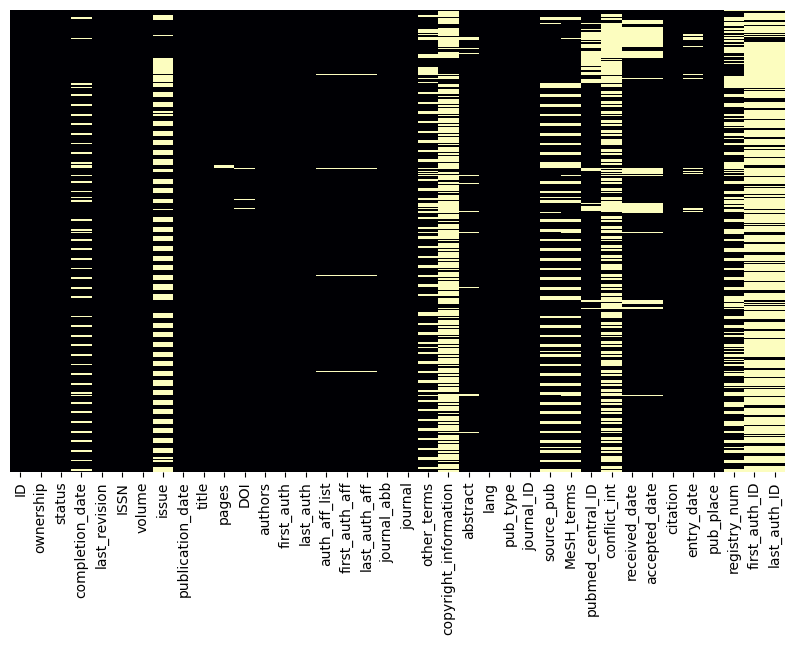

In [10]:
view_nan(articles)

In [13]:
display(articles.shape)

columns_to_check = tuple(['ID', 'title'])

articles_df = articles.drop_duplicates(subset=columns_to_check)

articles_df.shape

(240037, 38)

(44978, 38)

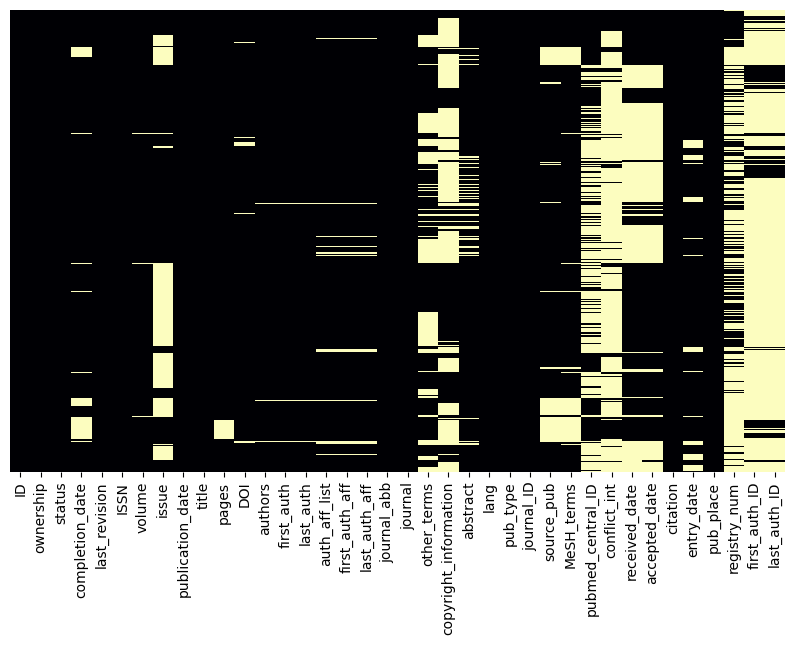

In [14]:
view_nan(articles_df)

In [ ]:
articles_df.info(memory_usage='deep')

In [ ]:
# articles_df.to_csv('../data/articles_df.csv')

## Create First Author DF

In [ ]:
articles_df[['DOI', 'First_Author', 'First_Auth_aff', 'First_Auth_ID']]

### Determine the geographical locations of the affiliations

In [ ]:
from geopy.geocoders import GoogleV3

In [ ]:
with open('../google_api_key.txt', 'r') as file:
    google_api_key = file.read().strip()

geolocator = GoogleV3(api_key=google_api_key)

In [ ]:
def obtener_coordenadas(institucion):
    location = geolocator.geocode(institucion)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [ ]:
articles_df['LA_lat'], articles_df['LA_lon'] = zip(*articles_df['Last_Auth_aff'].apply(obtener_coordenadas))

In [ ]:
articles_df

In [ ]:
articles_df.to_csv('../data/articles_df.csv')

In [ ]:
articles[['First_Auth_aff', 'Last_Auth_aff', 'Journal', 'Place']].head()

In [ ]:
with open('api_key.txt', 'r') as file:
    google_api_key = file.read().strip()

university_names = universities['Institution_Name'].tolist()
locations = universities['Location'].tolist()
    
geolocator = GoogleV3(google_api_key = api_key)

latitudes = []
longitudes = []

for university, location in zip(university_names, locations):
    try:
        location_info = geolocator.geocode(f"{university}, {location}")
        latitudes.append(location_info.latitude)
        longitudes.append(location_info.longitude)
    except AttributeError:
        latitudes.append(None)
        longitudes.append(None)

universities['Latitude'] = latitudes
universities['Longitude'] = longitudes

### Consider identifying the gender of the author based on their name, recognizing that this method may not always accurately reflect personal gender identity. Exercise sensitivity and be aware of the potential for inaccuracies in the process

**genderize.io** is a free API, but limited at 1000 requests by day.

    url = f'https://api.genderize.io/?name[]={name}'   

**The answer will be like this:**

    { "name": "peter",
      "gender": "male",
      "probability": 0.99,
      "count": 165452 }

In [ ]:
# import requests
# from tqdm.notebook import tqdm

# fst_auth_name = [name.split(' ')[0] for name in articles['first_author']]

# fst_auth_gd = []
# fst_auth_gd_prb = []

# for name in tqdm(fst_auth_name):
#     url = f'https://api.genderize.io/?name[]={name}'
#     res = requests.get(url)
#     res_api = res.json()
#     fst_auth_gd.append(res_api[0]['gender'])
#     fst_auth_gd_prb.append(res_api[0]['probability'])
    
# genderize = {'_id': [],
#              'fst_auth_name': [],
#              'fst_auth_gd': [],
#              'fst_auth_gd_prb': [],
#              'lst_auth_name': [],
#              'lst_auth_gd': [],
#              'lst_auth_gd_prb': []}

# genderize['_id'] = [i for i in articles['DOI']]
# genderize['fst_auth_name'] = fst_auth_name
# genderize['fst_auth_gd'] = fst_auth_gd
# genderize['fst_auth_gd_prb'] = fst_auth_gd_prb

# columns = ['_id', 'fst_auth_name', 'fst_auth_gd', 'fst_auth_gd_prb']
# genderize_df = pd.DataFrame(genderize, columns = columns)
# genderize_df.head()

# genderize_df.to_csv('../data/genderize_df_fst.csv', index = False)